<a href="https://colab.research.google.com/github/hannahwang1/NYSDOH-Fall-Prevention-Programs-Analysis/blob/main/NYSDOH_EBFPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Merging to include region infomation of host organization:

In [2]:
import pandas as pd

# Load the module
from google.colab import drive

# Mount the drive
drive.mount('/content/drive')

Mounted at /content/drive


##Fall Prevention Programs Data

In [2]:
# load FALL file using relative path 
df = pd.read_csv('/content/drive/MyDrive/MPH MBA/MPH/580: Practicum/NYSDOH EBFPP/FALLS_ExportParticipant2015.csv')
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (19,20,27,34,38,100,107,131) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Host Org System ID,Host Org Name,Host Org Type,Host Org Street,Host Org City,Host Org State,Host Org Zip,Host Org Contact Name,Host Org Contact Email,Host Org Contact Phone,...,Survey Last Q8 (V 1) / Q7 (V 2) / Q9 (V 3) - Talk to Healthcare,Survey Last Q8 (V 1) / Q7 (V 2) / Q9 (V 3) - Had Vision Checked,Survey Last Q8 (V 1) / Q7 (V 2) / Q9 (V 3) - Had Medication Review,Survey Last Q8 (V 1) / Q7 (V 2) / Q9 (V 3) - Participated in Another Fall Progtram,Survey Last Q8- Exercises at Home (V 1),Survey Last Q8- Made Changes in Home (V 1),Survey Last Q8 Made Safety Mods Home (V 2),Survey Last Q9 (V 2) / Q7 (V 3) Activity Level,Last Survey Timed Up and Go (optional),Last Survey Chair Stand (optional)
0,66434.0,Broome County Health Department,County Health Department,225 Front St.,Binghamton,NY,13905.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
1,66434.0,Broome County Health Department,County Health Department,225 Front St.,Binghamton,NY,13905.0,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
2,66434.0,Broome County Health Department,County Health Department,225 Front St.,Binghamton,NY,13905.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
3,66434.0,Broome County Health Department,County Health Department,225 Front St.,Binghamton,NY,13905.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
4,66434.0,Broome County Health Department,County Health Department,225 Front St.,Binghamton,NY,13905.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN


In [17]:
# Drop the variables from the data frame
df.drop(columns=["Host Org System ID",'Host Org Name',"Host Org Type",'Host Org Street', 'Host Org City', 'Host Org State', "Host Org Contact Name", 'Host Org Contact Email', "Host Org Contact Phone"], inplace=True)

In [25]:
# Print the number of non-missing values in each column
print(df.count())

Host Org System ID                                6327
Host Org Name                                     6327
Host Org Type                                     5731
Host Org Street                                   6327
Host Org City                                     6327
                                                  ... 
Survey Last Q8- Made Changes in Home (V 1)        3899
Survey Last Q8 Made Safety Mods Home (V 2)         774
Survey Last Q9 (V 2) / Q7 (V 3) Activity Level     621
Last Survey Timed Up and Go (optional)              24
Last Survey Chair Stand (optional)                   1
Length: 176, dtype: int64


##Program Region Data

In [3]:
# load region file using relative path 
df1 = pd.read_csv('/content/drive/MyDrive/MPH MBA/MPH/580: Practicum/NYSDOH EBFPP/NYSDOH EBFPP Host Organizations.csv')
df1.head()

,Organization Name,Mailing City,Mailing State,Region,Phone,Unnamed: 5,Unnamed: 6,Contact Person,Contact E-mail,Contact Phone #
0,Albany Medical Center,Delmar,NY,Eastern,NaN,Tom Moran from Trauma Center,NaN,NaN,NaN,NaN
1,Broome County Health Department,Binghamton,NY,Central,(607) 778-3929,Involved in the past - works with Michael Baue...,NaN,NaN,NaN,NaN
2,Candor EMS,Candor,NY,Central,NaN,NaN,NaN,NaN,NaN,NaN
3,Cattaraugus County Department of the Aging/NY ...,Olean,NY,Western,(716) 373-8032,NaN,NaN,NaN,NaN,NaN
4,Chautauqua County Office for the Aging,Mayville,NY,Western,(716) 753-4726,Active,NaN,NaN,NaN,NaN


In [4]:
# Drop the variables from the data frame
df1.drop(columns=['Mailing City', 'Mailing State', 'Phone', 'Unnamed: 5', "Unnamed: 6", 'Contact Person', "Contact E-mail", "Contact Phone #"], inplace=True)

In [5]:
# Rename the column 'old_name' to 'new_name'
df1 = df1.rename(columns={'Organization Name': 'Host Org Name'})

In [15]:
df1.head()

,Host Org Name,Region
0,Albany Medical Center,Eastern
1,Broome County Health Department,Central
2,Candor EMS,Central
3,Cattaraugus County Department of the Aging/NY ...,Western
4,Chautauqua County Office for the Aging,Western


In [26]:
# Print the number of non-missing values in each column
print(df1.count())

Host Org Name    75
Region           74
dtype: int64


##Merging

In [6]:
# Merge Fall and Regain on the 'Host Org Name' column
df_m = pd.merge(df, df1, on='Host Org Name')

In [22]:
df_m.head()

,Host Org System ID,Host Org Name,Host Org Type,Host Org Street,Host Org City,Host Org State,Host Org Zip,Host Org Contact Name,Host Org Contact Email,Host Org Contact Phone,...,Survey Last Q8 (V 1) / Q7 (V 2) / Q9 (V 3) - Had Vision Checked,Survey Last Q8 (V 1) / Q7 (V 2) / Q9 (V 3) - Had Medication Review,Survey Last Q8 (V 1) / Q7 (V 2) / Q9 (V 3) - Participated in Another Fall Progtram,Survey Last Q8- Exercises at Home (V 1),Survey Last Q8- Made Changes in Home (V 1),Survey Last Q8 Made Safety Mods Home (V 2),Survey Last Q9 (V 2) / Q7 (V 3) Activity Level,Last Survey Timed Up and Go (optional),Last Survey Chair Stand (optional),Region
0,66434.0,Broome County Health Department,County Health Department,225 Front St.,Binghamton,NY,13905.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,Central
1,66434.0,Broome County Health Department,County Health Department,225 Front St.,Binghamton,NY,13905.0,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,Central
2,66434.0,Broome County Health Department,County Health Department,225 Front St.,Binghamton,NY,13905.0,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,Central
3,66434.0,Broome County Health Department,County Health Department,225 Front St.,Binghamton,NY,13905.0,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,Central
4,66434.0,Broome County Health Department,County Health Department,225 Front St.,Binghamton,NY,13905.0,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,Central


In [16]:
df_m["Region"].describe()

count               6289
unique                 7
top       Suffolk County
freq                1575
Name: Region, dtype: object

In [27]:
# Print the number of non-missing values in each column
print(df_m.count())

Host Org System ID                                6289
Host Org Name                                     6289
Host Org Type                                     5693
Host Org Street                                   6289
Host Org City                                     6289
                                                  ... 
Survey Last Q8 Made Safety Mods Home (V 2)         757
Survey Last Q9 (V 2) / Q7 (V 3) Activity Level     603
Last Survey Timed Up and Go (optional)              24
Last Survey Chair Stand (optional)                   1
Region                                            6289
Length: 177, dtype: int64


# Explanatory Data Analysis

##Null Values

In [23]:
# Check for null values
null_mask = df_m.isnull().sum()

# Print the null mask
print(null_mask)

Host Org System ID                                 924
Host Org Name                                      924
Host Org Type                                     1520
Host Org Street                                    924
Host Org City                                      924
                                                  ... 
Survey Last Q8 Made Safety Mods Home (V 2)        6456
Survey Last Q9 (V 2) / Q7 (V 3) Activity Level    6610
Last Survey Timed Up and Go (optional)            7189
Last Survey Chair Stand (optional)                7212
Region                                             924
Length: 177, dtype: int64


In [7]:
import seaborn as sns

In [8]:
import matplotlib.pyplot as plt

##Region Column

In [28]:
# Create the frequency table
Region_freq = df_m['Region'].value_counts()

# Print the frequency table
print(Region_freq)

Suffolk County    1575
Western           1389
Nassau County     1310
Eastern           1136
Northern           363
Central            306
NYC                210
Name: Region, dtype: int64


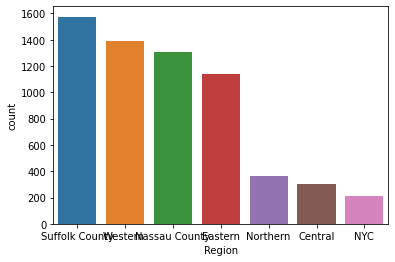

In [38]:
# Plot the frequency table as a histogram
sns.countplot(x="Region", data=df_m, order=df_m["Region"].value_counts().index)

# Show the plot
plt.show()

##Workshop Program

In [42]:
# Create the frequency table
WorkshopProgram_freq = df_m['Workshop Program'].value_counts()

# Print the frequency table
print(WorkshopProgram_freq)

Tai Chi for Arthritis    5239
Stepping On               754
MOB                       248
Tai Ji Quan                37
Stay Safe Stay Active      11
Name: Workshop Program, dtype: int64


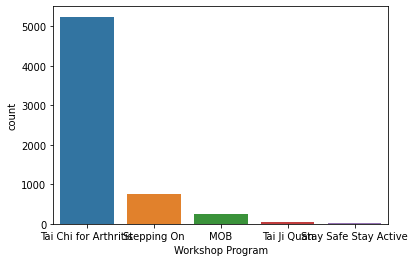

In [43]:
# Plot the frequency table as a histogram
sns.countplot(x="Workshop Program", data=df_m, order=df_m["Workshop Program"].value_counts().index)

# Show the plot
plt.show()

# Completion Rate

##Overall Completion Rate

In [10]:
# create a new column for the completion rate
df_m["Completion Rate"] = 0

# iterate through the rows of the DataFrame
for index, row in df_m.iterrows():
    enrolled = row["Workshop Num Enrolled"]
    completed = row["Workshop Num Completed"]

    # check if the number of enrolled participants is greater than 0
    if enrolled > 0:
        # calculate the completion rate
        completion_rate = (completed / enrolled) * 100

        # update the value in the "Completion Rate" column
        df_m.at[index, "Completion Rate"] = completion_rate

Mean, median, and standard deviation of the overall completion rate

In [20]:
from statistics import mean, median, stdev
# Calculate the mean 
mean_overall = df_m["Completion Rate"].mean()
print("Mean Overall Completion Rate:", mean_overall)

# Calculate the median 
median_overall = df_m["Completion Rate"].median()
print("Median Completion Rate:", median_overall)

# Calculate the standard deviation 
stdev_overall = df_m['Completion Rate'].std()
print("Standard Deviation of Overall Completion Rate;", stdev_overall)

Mean Overall Completion Rate: 16.859420490780536
Median Completion Rate: 5.0
Standard Deviation of Overall Completion Rate; 26.139455593224525


##Tai Chi for Arthritis Completion Rate

In [22]:
# Select rows where the 'Workshop Program' column is equal to 'Tai Chi for Arthritis'
df_arthritis = df_m[df_m['Workshop Program'] == 'Tai Chi for Arthritis']

In [35]:
# Print the number of non-missing values in Tai Chi for Arthritis
print(df_arthritis.count())

Host Org System ID    5239
Host Org Name         5239
Host Org Type         4760
Host Org Street       5239
Host Org City         5239
                      ... 
Unnamed: 6               0
Contact Person        1466
Contact E-mail         973
Contact Phone #        493
Completion Rate       5239
Length: 186, dtype: int64


Mean, median, and standard deviation of Tai Chi for Arthritis Completion Rate

In [23]:
# Calculate the mean 
mean_arthritis = df_arthritis["Completion Rate"].mean()
print("Mean Tai Chi for Arthritis Completion Rate:", mean_arthritis)

# Calculate the median 
median_arthritis = df_arthritis["Completion Rate"].median()
print("Median Tai Chi for Arthritis Completion Rate:", median_arthritis)

# Calculate the standard deviation 
stdev_arthritis = df_arthritis['Completion Rate'].std()
print("Standard Deviation of Tai Chi for Arthritis Completion Rate;", stdev_arthritis)

Mean Tai Chi for Arthritis Completion Rate: 9.284596297003246
Median Tai Chi for Arthritis Completion Rate: 5.0
Standard Deviation of Tai Chi for Arthritis Completion Rate; 12.126517940679825


##Stepping On Completion Rate

In [24]:
# Select rows where the 'Workshop Program' column is equal to 'Stepping On'
df_step = df_m[df_m['Workshop Program'] == 'Stepping On']

In [34]:
# Print the number of non-missing values in Stepping On
print(df_step.count())

Host Org System ID    754
Host Org Name         754
Host Org Type         692
Host Org Street       754
Host Org City         754
                     ... 
Unnamed: 6              0
Contact Person        179
Contact E-mail        179
Contact Phone #         0
Completion Rate       754
Length: 186, dtype: int64


Mean, median, and standard deviation of Stepping On Completion Rate

In [25]:
# Calculate the mean 
mean_step = df_step["Completion Rate"].mean()
print("Mean Stepping On Completion Rate:", mean_step)

# Calculate the median 
median_step = df_step["Completion Rate"].median()
print("Median Stepping On Completion Rate:", median_step)

# Calculate the standard deviation 
stdev_step = df_step['Completion Rate'].std()
print("Standard Deviation of Stepping On Completion Rate;", stdev_step)

Mean Stepping On Completion Rate: 68.19363395225464
Median Stepping On Completion Rate: 68.0
Standard Deviation of Stepping On Completion Rate; 19.96317091925418


##MOB Completion Rate

In [26]:
# Select rows where the 'Workshop Program' column is equal to 'MOB'
df_mob = df_m[df_m['Workshop Program'] == 'MOB']

In [33]:
# Print the number of non-missing values in MOB
print(df_mob.count())

Host Org System ID    248
Host Org Name         248
Host Org Type         193
Host Org Street       248
Host Org City         248
                     ... 
Unnamed: 6              0
Contact Person          0
Contact E-mail          0
Contact Phone #         0
Completion Rate       248
Length: 186, dtype: int64


Mean, median, and standard deviation of MOB Completion Rate

In [27]:
# Calculate the mean 
mean_mob = df_mob["Completion Rate"].mean()
print("Mean MOB Completion Rate:", mean_mob)

# Calculate the median 
median_mob = df_mob["Completion Rate"].median()
print("Median MOB Completion Rate:", median_mob)

# Calculate the standard deviation 
stdev_mob = df_mob['Completion Rate'].std()
print("Standard Deviation of MOB Completion Rate;", stdev_mob)

Mean MOB Completion Rate: 86.88306451612904
Median MOB Completion Rate: 100.0
Standard Deviation of MOB Completion Rate; 17.719315025803766


##Tai Ji Quan Completion Rate

In [28]:
# Select rows where the 'Workshop Program' column is equal to 'Tai Ji Quan'
df_quan = df_m[df_m['Workshop Program'] == 'Tai Ji Quan']

In [32]:
# Print the number of non-missing values in Tai Ji Quan
print(df_quan.count())

Host Org System ID    37
Host Org Name         37
Host Org Type         37
Host Org Street       37
Host Org City         37
                      ..
Unnamed: 6             0
Contact Person         0
Contact E-mail         0
Contact Phone #        0
Completion Rate       37
Length: 186, dtype: int64


Mean, median, and standard deviation of Tai Ji Quan Completion Rate

In [29]:
# Calculate the mean 
mean_quan = df_quan["Completion Rate"].mean()
print("Mean Tai Ji Quan Completion Rate:", mean_quan)

# Calculate the median 
median_quan = df_quan["Completion Rate"].median()
print("Median Tai Ji Quan Completion Rate:", median_quan)

# Calculate the standard deviation 
stdev_quan = df_quan['Completion Rate'].std()
print("Standard Deviation of Tai Ji Quan Completion Rate;", stdev_quan)

Mean Tai Ji Quan Completion Rate: 0.0
Median Tai Ji Quan Completion Rate: 0.0
Standard Deviation of Tai Ji Quan Completion Rate; 0.0


##Stay Safe Stay Active Completion Rate

In [36]:
# Select rows where the 'Workshop Program' column is equal to 'Stay Safe Stay Active'
df_stay = df_m[df_m['Workshop Program'] == 'Stay Safe Stay Active']

In [37]:
# Print the number of non-missing values in Stay Safe Stay Active
print(df_stay.count())

Host Org System ID    11
Host Org Name         11
Host Org Type         11
Host Org Street       11
Host Org City         11
                      ..
Unnamed: 6             0
Contact Person         0
Contact E-mail         0
Contact Phone #        0
Completion Rate       11
Length: 186, dtype: int64


Mean, median, and standard deviation of Stay Safe Stay Active Completion Rate

In [38]:
# Calculate the mean 
mean_stay = df_stay["Completion Rate"].mean()
print("Mean Stay Safe Stay Active Completion Rate:", mean_stay)

# Calculate the median 
median_stay = df_stay["Completion Rate"].median()
print("Median Stay Safe Stay Active Completion Rate:", median_stay)

# Calculate the standard deviation 
stdev_stay = df_stay['Completion Rate'].std()
print("Standard Deviation of Stay Safe Stay Active Completion Rate;", stdev_stay)

Mean Stay Safe Stay Active Completion Rate: 0.0
Median Stay Safe Stay Active Completion Rate: 0.0
Standard Deviation of Stay Safe Stay Active Completion Rate; 0.0
